In [1]:
import pandas as pd
career_link = pd.read_csv('career_link_processed_content_fullcols.csv')

In [2]:
career_link

,Job Title,Company,Company Link,City,Province or District,Female,Male,Salary Type,Undefined Salary Type,Salary Start,...,Industry_Điện / Điện tử,Industry_Vật tư / Thu mua,Industry_Tiếp thị,Industry_Mới tốt nghiệp / Thực tập,Industry_Môi trường / Xử lý chất thải,Industry_Xây dựng,Industry_Bảo hiểm,Industry_Phi chính phủ / Phi lợi nhuận,Industry_Ô tô,Content
0,.Net Developer [Huế],CÔNG TY TNHH SOFT WORLD VIỆT NAM,https://www.careerlink.vn//viec-lam-cua/cong-t...,Thừa Thiên - Huế,Thành phố Huế,1,1,Undefined,Thương lượng,NaN,...,0,0,0,0,0,0,0,0,0,"['net', 'developer', 'huế', 'developing', 'clo..."
1,.Net Developer (Senior/Lead),CÔNG TY CỔ PHẦN SYNODUS,https://www.careerlink.vn//viec-lam-cua/cong-t...,Hà Nội,Quận Cầu Giấy,1,1,Defined,NaN,40000000.0,...,0,0,0,0,0,0,0,0,0,"['net', 'developer', 'seniorlead', 'lập', 'tài..."
2,.Net Developer [Tân Bình],CÔNG TY TNHH SOFT WORLD VIỆT NAM,https://www.careerlink.vn//viec-lam-cua/cong-t...,Hồ Chí Minh,Quận Tân Bình,1,1,Undefined,Thương lượng,NaN,...,0,0,0,0,0,0,0,0,0,"['net', 'developer_tân', 'bình', 'developing',..."
3,.NET DEVELOPER,CÔNG TY CỔ PHẦN GIẢI PHÁP KINH DOANH NỀN TẢNG,https://www.careerlink.vn//viec-lam-cua/cong-t...,Hồ Chí Minh,Quận 4,1,1,Defined,NaN,600.0,...,0,0,0,0,0,0,0,0,0,"['net', 'developer', 'triển_khai', 'tích_hợp',..."
4,01 Chuyên Viên Quản Trị cơ sở dữ liệu/Database...,Rieker Vietnam Ltd.,https://www.careerlink.vn//viec-lam-cua/rieker...,Quảng Nam,Thị xã Điện Bàn,1,1,Undefined,Thương lượng,NaN,...,0,0,0,0,0,0,0,0,0,"['chuyên_viên', 'quản_trị', 'cơ_sở_dữ', 'liệud..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,Xuất nhập khẩu tiếng Nhật,G.A. CONSULTANTS VIETNAM,https://www.careerlink.vn//viec-lam-cua/g.a.-c...,Hồ Chí Minh,Quận 7,1,1,Defined,NaN,15000000.0,...,0,0,0,0,0,0,0,0,0,"['xuất_nhập_khẩu', 'tiếng', 'nhật', 'địa_điểm'..."
22796,[XUYÊN MỘC] CHUYÊN VIÊN TƯ VẤN BẢO HIÊM- DỰ ÁN...,Sun Life Việt Nam (SLV),https://www.careerlink.vn//viec-lam-cua/sun-li...,Bà Rịa - Vũng Tàu,Huyện Xuyên Mộc,1,1,Defined,NaN,10000000.0,...,0,0,0,0,0,0,1,0,0,"['xuyên', 'mộc', 'chuyên_viên', 'tư_vấn', 'bảo..."
22797,[Xuyên Mộc] - Chuyên Viên Tư Vấn Bảo Hiểm Kênh...,CÔNG TY TNHH MANULIFE (VIỆT NAM),https://www.careerlink.vn//viec-lam-cua/cong-t...,Bà Rịa - Vũng Tàu,Huyện Xuyên Mộc,1,1,Undefined,Cạnh tranh,NaN,...,0,0,0,0,0,0,1,0,0,"['xuyên', 'mộc', 'chuyên_viên', 'tư_vấn', 'bảo..."
22798,[Xuyên Mộc] Chuyên Viên Tư Vấn Bảo Hiểm Kênh L...,CÔNG TY TNHH MANULIFE (VIỆT NAM),https://www.careerlink.vn//viec-lam-cua/cong-t...,Bà Rịa - Vũng Tàu,Huyện Xuyên Mộc,1,1,Defined,NaN,10000000.0,...,0,0,0,0,0,0,1,0,0,"['xuyên', 'mộc', 'chuyên_viên', 'tư_vấn', 'bảo..."


In [3]:
# Step 1: Select relevant columns
selected_columns = [col for col in career_link.columns if col.startswith('Industry') or col.startswith('Job Type') or col.startswith('Level') or col.startswith('Education') or col.startswith('City')]
selected_columns.append('Content')  # Include the 'Content' column

# Step 2: Concatenate text from selected columns into a 'Content' column
career_link['Content'] = career_link[selected_columns].astype(str).apply(' '.join, axis=1)

In [4]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 3: Word2Vec Embedding
documents_tokens = [doc.split() for doc in career_link['Content']]
word2vec_model = Word2Vec(sentences=documents_tokens, vector_size=100, window=5, min_count=1, workers=4,sg=0)


In [5]:
# Function to convert a document to a vector using Word2Vec
def document_to_vector(doc_tokens, model):
    vector = [model.wv[word] for word in doc_tokens if word in model.wv]
    return sum(vector) / len(vector) if vector else None

# Convert all job content to vectors using Word2Vec
job_vectors = [document_to_vector(tokens, word2vec_model) for tokens in documents_tokens]

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

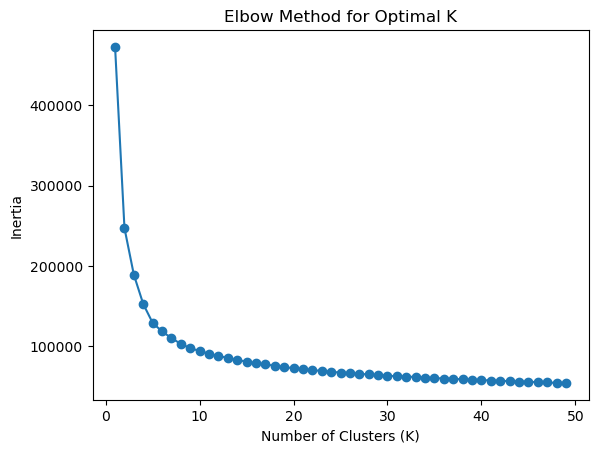

In [6]:
# Step 4: Clustering
# Find optimal K using the Elbow Method
inertia_values = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(job_vectors)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 50), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [7]:
# Choose the optimal K based on the plot and perform clustering
optimal_k = 6  # Adjust based on the Elbow Method graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(job_vectors)

# Add the cluster labels to the DataFrame
career_link['Cluster'] = clusters

# Display the DataFrame with cluster labels
career_link

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Job Title,Company,Company Link,City,Province or District,Female,Male,Salary Type,Undefined Salary Type,Salary Start,...,Industry_Vật tư / Thu mua,Industry_Tiếp thị,Industry_Mới tốt nghiệp / Thực tập,Industry_Môi trường / Xử lý chất thải,Industry_Xây dựng,Industry_Bảo hiểm,Industry_Phi chính phủ / Phi lợi nhuận,Industry_Ô tô,Content,Cluster
0,.Net Developer [Huế],CÔNG TY TNHH SOFT WORLD VIỆT NAM,https://www.careerlink.vn//viec-lam-cua/cong-t...,Thừa Thiên - Huế,Thành phố Huế,1,1,Undefined,Thương lượng,NaN,...,0,0,0,0,0,0,0,0,Thừa Thiên - Huế 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0...,2
1,.Net Developer (Senior/Lead),CÔNG TY CỔ PHẦN SYNODUS,https://www.careerlink.vn//viec-lam-cua/cong-t...,Hà Nội,Quận Cầu Giấy,1,1,Defined,NaN,40000000.0,...,0,0,0,0,0,0,0,0,Hà Nội 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0...,4
2,.Net Developer [Tân Bình],CÔNG TY TNHH SOFT WORLD VIỆT NAM,https://www.careerlink.vn//viec-lam-cua/cong-t...,Hồ Chí Minh,Quận Tân Bình,1,1,Undefined,Thương lượng,NaN,...,0,0,0,0,0,0,0,0,Hồ Chí Minh 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0....,2
3,.NET DEVELOPER,CÔNG TY CỔ PHẦN GIẢI PHÁP KINH DOANH NỀN TẢNG,https://www.careerlink.vn//viec-lam-cua/cong-t...,Hồ Chí Minh,Quận 4,1,1,Defined,NaN,600.0,...,0,0,0,0,0,0,0,0,Hồ Chí Minh 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0....,0
4,01 Chuyên Viên Quản Trị cơ sở dữ liệu/Database...,Rieker Vietnam Ltd.,https://www.careerlink.vn//viec-lam-cua/rieker...,Quảng Nam,Thị xã Điện Bàn,1,1,Undefined,Thương lượng,NaN,...,0,0,0,0,0,0,0,0,Quảng Nam 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 ...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,Xuất nhập khẩu tiếng Nhật,G.A. CONSULTANTS VIETNAM,https://www.careerlink.vn//viec-lam-cua/g.a.-c...,Hồ Chí Minh,Quận 7,1,1,Defined,NaN,15000000.0,...,0,0,0,0,0,0,0,0,Hồ Chí Minh 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0....,3
22796,[XUYÊN MỘC] CHUYÊN VIÊN TƯ VẤN BẢO HIÊM- DỰ ÁN...,Sun Life Việt Nam (SLV),https://www.careerlink.vn//viec-lam-cua/sun-li...,Bà Rịa - Vũng Tàu,Huyện Xuyên Mộc,1,1,Defined,NaN,10000000.0,...,0,0,0,0,0,1,0,0,Bà Rịa - Vũng Tàu 0.0 0.0 0.0 1.0 0.0 0.0 0.0 ...,1
22797,[Xuyên Mộc] - Chuyên Viên Tư Vấn Bảo Hiểm Kênh...,CÔNG TY TNHH MANULIFE (VIỆT NAM),https://www.careerlink.vn//viec-lam-cua/cong-t...,Bà Rịa - Vũng Tàu,Huyện Xuyên Mộc,1,1,Undefined,Cạnh tranh,NaN,...,0,0,0,0,0,1,0,0,Bà Rịa - Vũng Tàu 0.0 0.0 0.0 1.0 0.0 0.0 0.0 ...,1
22798,[Xuyên Mộc] Chuyên Viên Tư Vấn Bảo Hiểm Kênh L...,CÔNG TY TNHH MANULIFE (VIỆT NAM),https://www.careerlink.vn//viec-lam-cua/cong-t...,Bà Rịa - Vũng Tàu,Huyện Xuyên Mộc,1,1,Defined,NaN,10000000.0,...,0,0,0,0,0,1,0,0,Bà Rịa - Vũng Tàu 0.0 0.0 0.0 1.0 0.0 0.0 0.0 ...,1


In [8]:
# Function to get the column with the highest sum for each cluster
def get_most_frequent_column(cluster_df, column_prefix):
    column_names = [col for col in cluster_df.columns if col.startswith(column_prefix)]
    sums = cluster_df[column_names].sum()
    most_frequent_column = sums.idxmax()
    return most_frequent_column[len(column_prefix)+1:]

# Display cluster characteristics with the most frequent values
cluster_summary = career_link.groupby('Cluster').apply(lambda cluster_df: pd.Series({
    'Number of Jobs': cluster_df['Content'].count(),
    'Most Frequent Industry': get_most_frequent_column(cluster_df, 'Industry'),
    'Most Frequent Job Type': get_most_frequent_column(cluster_df, 'Job Type'),
    'Most Frequent Level': get_most_frequent_column(cluster_df, 'Level'),
    'Most Frequent Education': get_most_frequent_column(cluster_df, 'Education')
})).reset_index()

print("\nCluster Characteristics:")
cluster_summary


Cluster Characteristics:


,Cluster,Number of Jobs,Most Frequent Industry,Most Frequent Job Type,Most Frequent Level,Most Frequent Education
0,0,2067,Bán hàng / Kinh doanh,Nhân viên toàn thời gian,Nhân viên,Trung cấp
1,1,3437,Bảo hiểm,Nhân viên toàn thời gian,Nhân viên,Cao đẳng
2,2,1146,Dịch vụ khách hàng,Nhân viên toàn thời gian,Nhân viên,Cử nhân
3,3,4403,Bán hàng / Kinh doanh,Nhân viên toàn thời gian,Nhân viên,Cao đẳng
4,4,6030,Bán hàng / Kinh doanh,Nhân viên toàn thời gian,Nhân viên,Cao đẳng
5,5,5717,Bán hàng / Kinh doanh,Nhân viên toàn thời gian,Nhân viên,Cao đẳng


In [9]:
first_attributes_df = career_link.groupby('Cluster').apply(lambda cluster_df: pd.Series({
    'Cluster': cluster_df['Cluster'].iloc[1],
    'Benefits': cluster_df['Benefits'].iloc[1],
    'Description': cluster_df['Description'].iloc[1],
    'City': cluster_df['City'].iloc[1],
    'Required Skills': cluster_df['Required Skills'].iloc[1],
})).reset_index(drop=True)

first_attributes_df

,Cluster,Benefits,Description,City,Required Skills
0,0,NaN,['- Lái xe nâng chuyên trách việc hạ hàng tại ...,Bà Rịa - Vũng Tàu,"['- Có bằng lái xe nâng', '- Tốt nghiệp trung ..."
1,1,NaN,"['- Tiếp cận, khai thác khách hàng tiềm năng, ...",Nhật Bản,['- Giao tiếp thành thạo tiếng Nhật (trình độ ...
2,2,NaN,['- Developing Cloud-based application systems...,Hồ Chí Minh,['- 2+ years of experience- Knowledge of OOP- ...
3,3,NaN,['* Công việc Tổng Vụ:* Quản lý Bảo vệ nhà máy...,Bà Rịa - Vũng Tàu,"['- Trình độ: Đại học trở lên, chuyên ngành: K..."
4,4,['Lương thỏa thuận xứng đáng theo năng lực và ...,"['* MÔ TẢ CÔNG VIỆC', '-\xa0Tham gia nghiên cứ...",Hà Nội,"['- Tốt nghiệp Cao đẳng trở lên.', '- Biết tiế..."
5,5,NaN,['1.\xa0\xa0\xa0\xa0 Phụ trách công việc hành ...,Long An,"['1. Biết tiếng trung: Nghe, nói, đọc,viết. Bi..."


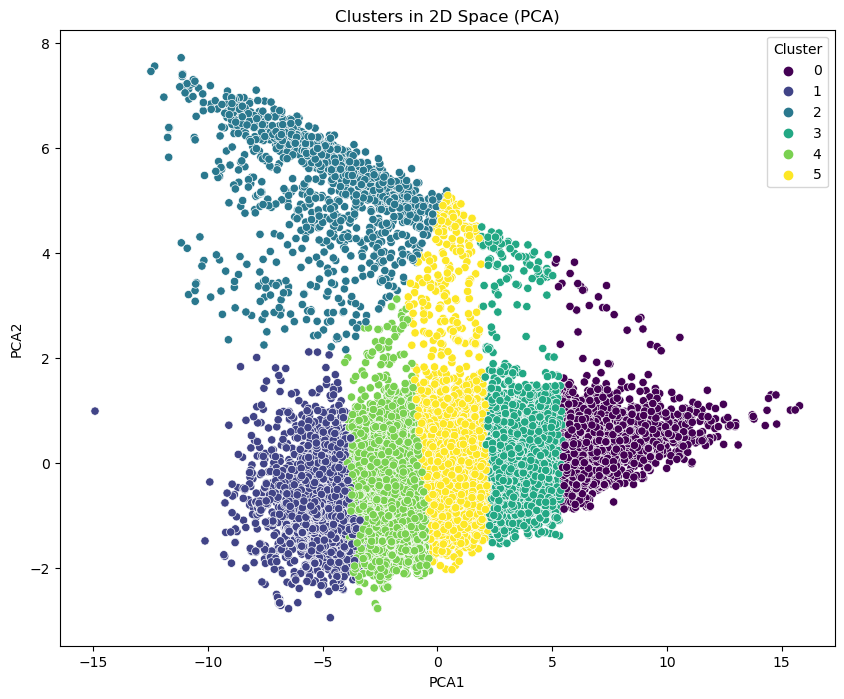

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
job_vectors_pca = pca.fit_transform(job_vectors)

# Add PCA components to the DataFrame
career_link['PCA1'] = job_vectors_pca[:, 0]
career_link['PCA2'] = job_vectors_pca[:, 1]

# Plot clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=career_link, palette='viridis')
plt.title('Clusters in 2D Space (PCA)')
plt.show()